pip install -U scikit-learn

In [ ]:
pip install pandas-profiling

In [69]:
import pandas_profiling
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
import pandas as pd
import numpy as np

warnings.filterwarnings("ignore")
rcParams["figure.figsize"]=10,6
np.random.seed(42)
%matplotlib inline

In [212]:
 df = pd.read_csv("Pictures/smartphone.csv")

In [216]:
# Importing train_test_split function
from sklearn.model_selection import train_test_split
X = df.drop('price_range', axis=1)
y = df['price_range']

In [219]:
# Splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [220]:
#Importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier


#creating a classifier
clf=RandomForestClassifier(n_estimators=100)

#Training the model using the training sets
clf.fit(X_train,y_train)


y_pred=clf.predict(X_test)


In [221]:
#Importing scikit-learn metrics module for accuracy calculation
from sklearn import metrics


metrics.accuracy_score(y_test,y_pred)

0.855

In [238]:
df.columns.all

<bound method Index.all of Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')>

In [241]:
#checking the feature importance

feature_imp = pd.Series(clf.feature_importances_,index=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']).sort_values(ascending=False)
feature_imp

ram              0.459982
battery_power    0.066146
px_height        0.055940
px_width         0.055601
mobile_wt        0.044407
int_memory       0.038147
talk_time        0.033623
pc               0.032401
sc_w             0.030823
sc_h             0.030581
clock_speed      0.029321
fc               0.027622
m_dep            0.026075
n_cores          0.025375
four_g           0.008080
touch_screen     0.007610
blue             0.007482
wifi             0.007216
dual_sim         0.007135
three_g          0.006432
dtype: float64

No handles with labels found to put in legend.


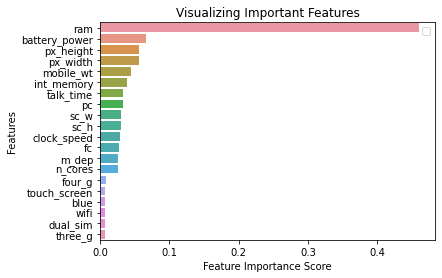

In [242]:
import seaborn as sns
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [296]:
#dropping the least important feature three_g

X = df.drop(['price_range','three_g','dual_sim','blue'], axis=1)
y = df['price_range']

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [326]:
clf=RandomForestClassifier(n_estimators=140)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [327]:
metrics.accuracy_score(y_test,y_pred)

0.89

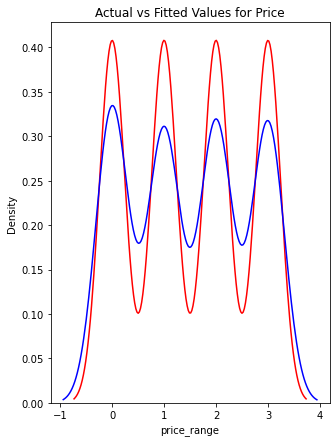

In [328]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()